In [47]:
#%pylab inline
%matplotlib widget
%pylab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as ss
import scipy.signal as sig
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle as Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
import random

Using matplotlib backend: module://ipympl.backend_nbagg
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
import sys  
sys.path.insert(0, '/Users/JanviMadhani/satellite_planes')

import fortran_reader as fr

# Read in Catalogs from New Horizon

### Filaments

### Haloes

In [49]:
filepath_nh = '/Users/JanviMadhani/satellite_planes/catalogs/tree_bricks970'
haloes_nh = fr.ReadTreebrick_lowp(filepath_nh)


nbodies: [126492136] mpart: [1.3052102e-05] aexp: [0.82587326] omega_t: [0.39877856] age: [11.216812] nsub: [19209 10241] nhaloes: 29450
Reading haloes took 121.22 secs.
Total time was 121.23 secs.


In [50]:
haloes_nh_dict = haloes_nh.treebricks_dict

In [13]:
haloes_nh_dict.keys()

dict_keys(['nbodies', 'mpart', 'aexp', 'omega_t', 'age_univ', 'nh_old', 'nsub_old', 'nhaloes', 'haloes', 'lbox_NH', 'lbox_HAGN'])

In [14]:
haloes_nh_dict['haloes'][0].keys()

dict_keys(['npart', 'members', 'my_number', 'my_timestep', 'level', 'host_halo', 'host_sub', 'nchild', 'nextsub', 'mass', 'px', 'py', 'pz', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'rmax', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'rvir', 'mvir', 'tvir', 'cvel', 'rho_0', 'r_c'])

In [15]:
nhaloes = haloes_nh_dict['nhaloes']
halo_lbox_NH = haloes_nh_dict['lbox_NH']

In [16]:
print(haloes_nh_dict['lbox_HAGN'])

[117.981895]


### Galaxies

In [4]:
filepath_catalog = '/Users/JanviMadhani/satellite_planes/catalogs/tree_bricks970_stars_NH'
galaxies = fr.GalaxyCatalog(filepath_catalog)

nbodies: [337682774] mpart: [8.59259648e-08] aexp: [0.82587326] omega_t: [0.39877856] age: [11.21741055] nsub: [1186 4248] nmax: 5434
Reading galaxies took 107.65 secs.
Total time was 107.66 secs.


In [5]:
catalog_dict = galaxies.treebricks_dict

In [6]:
catalog_dict.keys()

dict_keys(['nbodies', 'mpart', 'aexp', 'omega_t', 'age_univ', 'nb_of_galaxies', 'nb_of_subgals', 'nmax', 'galaxies', 'lbox_NH', 'lbox_HAGN'])

In [7]:
catalog_dict['galaxies'][0].keys()

dict_keys(['npart', 'members', 'my_number', 'my_timestep', 'level', 'host_gal', 'host_subgal', 'nchild', 'nextsub', 'mass', 'px', 'py', 'pz', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'rmax', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho_0', 'r_c', 'rr'])

In [17]:
ngalaxies = catalog_dict['nmax']
gal_lbox_NH = catalog_dict['lbox_NH']

## Find MW types

### MW Type DM Haloes

In [18]:
#first extract positions
halo_px = [haloes_nh_dict['haloes'][i]['px'] for i in range(nhaloes)]
halo_py = [haloes_nh_dict['haloes'][i]['py'] for i in range(nhaloes)]
halo_pz = [haloes_nh_dict['haloes'][i]['pz'] for i in range(nhaloes)]

halo_px = np.asarray(halo_px)
halo_py = np.asarray(halo_py)
halo_pz = np.asarray(halo_pz)


#then, constrain to 'zoom portion', which is radius of 20 Mpc
r = 10
halo_zoom = np.where(((-r < halo_px) & (halo_px < r )) & ((-r < halo_py) & (halo_py < r )) &
                      ((-r < halo_pz) & (halo_pz < r )))



halo_rvir = [haloes_nh_dict['haloes'][i]['rvir'] for i in range(nhaloes)]
halo_rvir = np.asarray(halo_rvir)
#print(np.max(halo_rvir[MW_type_haloes])*20)


#apply zoom masks
halo_px = halo_px[halo_zoom]
halo_py = halo_py[halo_zoom]
halo_pz = halo_pz[halo_zoom]
halo_rvir = halo_rvir[halo_zoom]

In [19]:
halo_lx = [haloes_nh_dict['haloes'][i]['Lx'] for i in range(nhaloes)]
halo_ly = [haloes_nh_dict['haloes'][i]['Ly'] for i in range(nhaloes)]
halo_lz = [haloes_nh_dict['haloes'][i]['Lz'] for i in range(nhaloes)]

halo_lx = np.asarray(halo_lx)
halo_ly = np.asarray(halo_ly)
halo_lz = np.asarray(halo_lz)

halo_lx = halo_lx[halo_zoom]
halo_ly = halo_ly[halo_zoom]
halo_lz = halo_lz[halo_zoom]

#and get level 

halo_level = [haloes_nh_dict['haloes'][i]['level'] for i in range(nhaloes)]
halo_level = np.asarray(halo_level)
halo_level = halo_level[halo_zoom]


In [20]:
#MW has halo ~10e12 Msun

#find haloes with mass 9e12 - 11e12
halo_masses = [haloes_nh_dict['haloes'][i]['mass'] for i in range(nhaloes)]
halo_masses = np.asarray(halo_masses)*10e11
halo_masses = np.squeeze(halo_masses)

#apply zoom mask
halo_masses = halo_masses[halo_zoom]



#don't put upper bound, just look at 10e12 and higher (the upper bound is already 10e13 for NH)
MW_type_haloes = np.where(10e12 < halo_masses) 

In [21]:
#halo_px[14270]

### MW Type Galaxies
https://ui.adsabs.harvard.edu/abs/2006MNRAS.369.1688D/abstract#:~:text=In%20this%20two%2Dcomponent%20model,truncated%20near%20the%20virial%20radius.
<break>
https://academic.oup.com/mnras/article/414/3/2446/1042117
<break>
https://iopscience.iop.org/article/10.1088/0004-637X/794/1/59

In [22]:
#the Milky Way's virial radius and mass are rvir ~= 200 kpc and Mvir ~= 1.5 × 1012Msolar.
#look for galaxies greater than 8e10Msun

#find gals with mvir 1e12 - 2e12
gal_mvir = [catalog_dict['galaxies'][i]['mvir'] for i in range(ngalaxies)]
gal_mvir = np.asarray(gal_mvir)*10e11
gal_mvir = np.squeeze(gal_mvir)


gal_m = [catalog_dict['galaxies'][i]['mass'] for i in range(ngalaxies)]
gal_m = np.asarray(gal_m)*10e11
gal_m = np.squeeze(gal_m)


print(len(gal_m))

#by virial mass
#MW_type_gals = np.where((0.5e12 < galaxy_mvir) & (galaxy_mvir < 2e12 ))
MW_type_gals = np.where((gal_mvir > 8e10))
print(MW_type_gals)

"""
by mass ~6e10 (5e10 in thin disk, 1e10 in thick disk, 1e10 bulge)

"""


5434
(array([   0,    1,    2,    3,    6,    7,    9,   10,   12,   13,   18,
         19,   20,   21,   22,   24,   27,   28,   29,   30,   31,   32,
         33,   34,   37,   38,   41,   42,   43,   45,   55,   60,   65,
         68,   70,   71,   73,   75,   79,   86,   90,   95,   99,  113,
        117,  122,  126,  136,  139,  143,  152,  161,  165,  179,  275,
        380,  477,  686,  981, 1022, 1156, 1275, 2438, 2583, 3021]),)


'\nby mass ~6e10 (5e10 in thin disk, 1e10 in thick disk, 1e10 bulge)\n\n'

In [23]:
#look at where they are
gal_px = [catalog_dict['galaxies'][i]['px'] for i in range(ngalaxies)]
gal_py = [catalog_dict['galaxies'][i]['py'] for i in range(ngalaxies)]
gal_pz = [catalog_dict['galaxies'][i]['pz'] for i in range(ngalaxies)]

gal_px = np.asarray(gal_px)
gal_py = np.asarray(gal_py)
gal_pz = np.asarray(gal_pz)

gal_rvir = [catalog_dict['galaxies'][i]['rvir'] for i in range(ngalaxies)]
gal_rvir = np.asarray(gal_rvir)

In [24]:
gal_lz = [catalog_dict['galaxies'][i]['Lz'] for i in range(ngalaxies)]
gal_lx = [catalog_dict['galaxies'][i]['Lx'] for i in range(ngalaxies)]
gal_ly = [catalog_dict['galaxies'][i]['Ly'] for i in range(ngalaxies)]

gal_vz = [catalog_dict['galaxies'][i]['vz'] for i in range(ngalaxies)]
gal_vx = [catalog_dict['galaxies'][i]['vx'] for i in range(ngalaxies)]
gal_vy = [catalog_dict['galaxies'][i]['vy'] for i in range(ngalaxies)]

gal_spins = [catalog_dict['galaxies'][i]['spin'] for i in range(ngalaxies)]

gal_lz = np.asarray(gal_lz)
gal_lx = np.asarray(gal_lx)
gal_ly = np.asarray(gal_ly)

gal_vz = np.asarray(gal_vz)
gal_vx = np.asarray(gal_vx)
gal_vy = np.asarray(gal_vy)

gal_spins = np.asarray(gal_spins)

#get level
gal_level = [catalog_dict['galaxies'][i]['level'] for i in range(ngalaxies)]
gal_level = np.asarray(gal_level)

In [25]:
print(gal_level)
level_one = np.where(gal_level == 1)
print(len(level_one[0]))

[1 1 1 ... 2 2 2]
1186


In [26]:



fig = plt.figure(figsize=[10,4])

ax = fig.add_subplot(1, 2, 1, projection='3d')

im1 = ax.scatter3D(gal_px,gal_py,gal_pz,
                      s=gal_rvir*50,c=np.squeeze(gal_mvir),cmap='inferno',alpha=0.4)

plt.colorbar(im1,label=r'Mass of Halo [$M_\odot$]')

ax.set_title('All Galaxies')
ax.autoscale('False')



ax = fig.add_subplot(1, 2, 2, projection='3d')

im2 = ax.scatter3D(gal_px[MW_type_gals],gal_py[MW_type_gals],gal_pz[MW_type_gals],
                      s=gal_rvir[MW_type_gals]*50,c=(gal_mvir[MW_type_gals]),cmap='inferno',alpha=0.4)
ax.set_title('MW Type Galaxies')
ax.autoscale('False')

plt.colorbar(im2,label=r'Mass of Halo [$M_\odot$]')


plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Run these next two blocks if you want to rescale to code units

In [27]:
#move them all to the right location
#xcoord = 0.18776
#ycoord = 0.42237
#zcoord = 0.27435 

xcoord = 0.5
ycoord = 0.5
zcoord = 0.5

In [22]:
#see which MW type galaxies fall inside which MW type Haloes
#first normalize the positions

"""gal_px = gal_px/gal_lbox_NH 
gal_py = gal_py/gal_lbox_NH 
gal_pz = gal_pz/gal_lbox_NH
gal_rvir = gal_rvir/gal_lbox_NH 

gal_px = gal_px + xcoord
gal_py = gal_py + ycoord
gal_pz = gal_pz + zcoord


halo_px = halo_px/halo_lbox_NH 
halo_py = halo_py/halo_lbox_NH 
halo_pz = halo_pz/halo_lbox_NH 
halo_rvir = halo_rvir/halo_lbox_NH 

halo_px = halo_px + xcoord
halo_py = halo_py + ycoord
halo_pz = halo_pz + zcoord"""

'gal_px = gal_px/gal_lbox_NH \ngal_py = gal_py/gal_lbox_NH \ngal_pz = gal_pz/gal_lbox_NH\ngal_rvir = gal_rvir/gal_lbox_NH \n\ngal_px = gal_px + xcoord\ngal_py = gal_py + ycoord\ngal_pz = gal_pz + zcoord\n\n\nhalo_px = halo_px/halo_lbox_NH \nhalo_py = halo_py/halo_lbox_NH \nhalo_pz = halo_pz/halo_lbox_NH \nhalo_rvir = halo_rvir/halo_lbox_NH \n\nhalo_px = halo_px + xcoord\nhalo_py = halo_py + ycoord\nhalo_pz = halo_pz + zcoord'

## Resume Analysis Here

In [28]:
#just look at location of EVERYTHING
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imgal = ax.scatter3D(gal_px,gal_py,gal_pz,
                      s=gal_rvir*50**2,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='All Galaxies')
imhalo = ax.scatter3D(halo_px[MW_type_haloes],halo_py[MW_type_haloes],halo_pz[MW_type_haloes],
                      s=halo_rvir[MW_type_haloes]*50**2,c='rosybrown',edgecolors='indianred',alpha=0.4,label='MW Type Haloes')

#plt.colorbar(imgal,label=r'Mass of Galaxy [$M_\odot$]')
#plt.colorbar(imhalo,label=r'Mass of Halo [$M_\odot$]')
ax.set_title('MW type Haloes and entire volume of Galaxies')
plt.legend(loc="upper right", markerscale=1)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Routine to find Haloes of MW type Galaxies

We identified possible MW type galaxies, now we look for their haloes, if they are >10e11 Msun, they become a candidate. Then we identify all satellites within 1 Rvir of halo 

In [29]:
systems = []
for i,val in enumerate(MW_type_gals[0]):
    gal_search_thresh = 1 #number of virial radii
    h_pxs = halo_px
    h_pys = halo_py
    h_pzs = halo_pz
    gvir = gal_rvir[val]
    g_px = gal_px[val]
    g_py = gal_py[val]
    g_pz = gal_pz[val]
    

    
    #within search radius AND >10e12 Msun
    possible_haloes = np.where(((g_px - gal_search_thresh*gvir  < h_pxs) & (h_pxs < gal_search_thresh*gvir + g_px))
                            & ((g_py - gal_search_thresh*gvir  < h_pys) & (h_pys < gal_search_thresh*gvir + g_py))
                            & ((g_pz - gal_search_thresh*gvir  < h_pzs) & (h_pzs < gal_search_thresh*gvir + g_pz))
                            & (halo_masses>10e11))

    #print(possible_haloes[0])
    if len(halo_masses[possible_haloes]) < 1:
        print(f'No halo satisfies conditions of MW type system {i}')
    
    else:
        system = {}
        host_halo_mask = np.where(halo_masses == np.max(halo_masses[possible_haloes]))
        host_halo_mass = halo_masses[host_halo_mask]
        #print(host_halo_mass)
        h_px = halo_px[host_halo_mask]
        h_py = halo_py[host_halo_mask]
        h_pz = halo_pz[host_halo_mask]
        hrvir = halo_rvir[host_halo_mask]
        h_lx = halo_lx[host_halo_mask]
        h_ly = halo_ly[host_halo_mask]
        h_lz = halo_lz[host_halo_mask]
        h_lev = halo_level[host_halo_mask]
        
        h_angmom = np.sqrt(h_lz**2 + h_ly**2 + h_lx**2)
        h_iz = np.degrees(np.arccos(h_lz/h_angmom))
        system['halo_iz'] = h_iz
        #print('hrvir = ',hrvir)
        
        
        
        system['halo_ID'] = host_halo_mask[0][0]
        system['halo_px'] = h_px
        system['halo_py'] = h_py
        system['halo_pz'] = h_pz
        system['halo_rvir'] = hrvir
        system['halo_mass'] = host_halo_mass
        system['halo_level'] = h_lev
        g_pxs = gal_px
        g_pys = gal_py
        g_pzs = gal_pz

        
        #find all galaxies within this 1 virial radii halo, and identify the central 
        sat_thresh = 2
        #"""        
        within_rad = np.where(((h_px - sat_thresh*hrvir  < g_pxs) & (g_pxs < sat_thresh*hrvir + h_px)) &
                             ((h_py - sat_thresh*hrvir  < g_pys) & (g_pys < sat_thresh*hrvir + h_py)) &
                             ((h_pz - sat_thresh*hrvir  < g_pzs) & (g_pzs < sat_thresh*hrvir + h_pz)))
                             
        #"""
        """
        
        distance = 0.3 #look for satellites within 0.3 Mpc *1000 kpc = 300 kpc
        within_rad = np.where(((h_px - distance  < g_pxs) & (g_pxs < distance + h_px)) &
                             ((h_py - distance  < g_pys) & (g_pys < distance + h_py)) &
                             ((h_pz - distance  < g_pzs) & (g_pzs < distance + h_pz)))
        """
        
        
        #assign sattelite galaxies parameters
        sat_pxs = g_pxs[within_rad]
        sat_pys = g_pys[within_rad]
        sat_pzs = g_pzs[within_rad]
        sat_rvirs = gal_rvir[within_rad]
        sat_mvirs = gal_mvir[within_rad]
        sat_lx = gal_lx[within_rad]
        sat_ly = gal_ly[within_rad]
        sat_lz = gal_lz[within_rad]
        sat_vx = gal_vx[within_rad]
        sat_vy = gal_vy[within_rad]
        sat_vz = gal_vz[within_rad]
        sat_spins = gal_spins[within_rad]
        sat_levs = gal_level[within_rad]
        

        
        #find the most massive galaxy that is within 0.2 of the host halo -- this is MW analog
        vir_thresh = 0.2

        within_vir = np.where(((h_px - vir_thresh*hrvir  < sat_pxs) & (sat_pxs < vir_thresh*hrvir + h_px)) &
                             ((h_py - vir_thresh*hrvir  < sat_pys) & (sat_pys < vir_thresh*hrvir + h_py)) &
                             ((h_pz - vir_thresh*hrvir  < sat_pzs) & (sat_pzs < vir_thresh*hrvir + h_pz)))
        MW_analog_mask = np.where(sat_mvirs == np.max(sat_mvirs[within_vir]))
        #print('MW MASK',MW_analog_mask)
        
        MW_px = sat_pxs[MW_analog_mask]
        MW_py = sat_pys[MW_analog_mask]
        MW_pz = sat_pzs[MW_analog_mask]
        MW_mvir = sat_mvirs[MW_analog_mask]
        MW_rvir = sat_rvirs[MW_analog_mask]
        MW_lx = sat_lx[MW_analog_mask]
        MW_ly = sat_ly[MW_analog_mask]
        MW_lz = sat_lz[MW_analog_mask]
        MW_vx = sat_vx[MW_analog_mask]
        MW_vy = sat_vy[MW_analog_mask]
        MW_vz = sat_vz[MW_analog_mask]
        MW_spin = sat_spins[MW_analog_mask]
        MW_level = sat_levs[MW_analog_mask]
        
        MW_angmom = np.sqrt(MW_lz**2 + MW_ly**2 + MW_lx**2)
        MW_iz = np.degrees(np.arccos(MW_lz/MW_angmom))
        system['MW_iz'] = MW_iz
        #print('hrvir = ',hrvir)
        
        
        system['MW_px'] = MW_px
        system['MW_py'] = MW_py
        system['MW_pz'] = MW_pz
        system['MW_mvir'] = MW_mvir
        system['MW_rvir'] = MW_rvir
        system['MW_spin'] = MW_spin
        system['MW_lx'] = MW_lx
        system['MW_ly'] = MW_ly
        system['MW_lz'] = MW_lz
        system['MW_vx'] = MW_vx
        system['MW_vy'] = MW_vy
        system['MW_vz'] = MW_vz
        system['MW_level'] = MW_level
        
        #remove central galaxy from satellite list
        sat_pxs = np.delete(sat_pxs,MW_analog_mask)
        sat_pys = np.delete(sat_pys,MW_analog_mask)
        sat_pzs = np.delete(sat_pzs,MW_analog_mask)
        sat_rvirs = np.delete(sat_rvirs,MW_analog_mask)
        sat_mvirs = np.delete(sat_mvirs,MW_analog_mask)
        sat_lx = np.delete(sat_lx,MW_analog_mask)
        sat_ly = np.delete(sat_ly,MW_analog_mask)
        sat_lz = np.delete(sat_lz,MW_analog_mask)
        sat_vx = np.delete(sat_vx,MW_analog_mask)
        sat_vy = np.delete(sat_vy,MW_analog_mask)
        sat_vz = np.delete(sat_vz,MW_analog_mask)
        sat_spins = np.delete(sat_spins,MW_analog_mask)
        sat_levs = np.delete(sat_levs,MW_analog_mask)
        
        
        
        
        sat_angmom = np.sqrt(sat_lz**2 + sat_ly**2 + sat_lx**2)
        sat_iz = np.degrees(np.arccos(sat_lz/sat_angmom))
        system['sat_iz'] = sat_iz
        
        system['sat_pxs'] = sat_pxs
        system['sat_pys'] = sat_pys
        system['sat_pzs'] = sat_pzs
        system['sat_vxs'] = sat_vx
        system['sat_vys'] = sat_vy
        system['sat_vzs'] = sat_vz
        system['sat_rvirs'] = sat_rvirs
        system['sat_mvirs'] = sat_mvirs
        system['sat_levels'] = sat_levs
        
        systems.append(system)
        #print(MW_mvir,np.max(gal_mvir[within_vir]))
        #print('MW:',MW_px,MW_py,MW_pz)
        #print('Halo:',h_px,h_py,h_pz)
        
        
        
    
   

No halo satisfies conditions of MW type system 16
No halo satisfies conditions of MW type system 37
No halo satisfies conditions of MW type system 39
No halo satisfies conditions of MW type system 52
No halo satisfies conditions of MW type system 55
No halo satisfies conditions of MW type system 56
No halo satisfies conditions of MW type system 57
No halo satisfies conditions of MW type system 58
No halo satisfies conditions of MW type system 59
No halo satisfies conditions of MW type system 61
No halo satisfies conditions of MW type system 63
No halo satisfies conditions of MW type system 64


### Look at all systems at once

In [30]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')
labels= ['MW type DM Halo','Satellites','Central']


#size by virial radius
for MWsystem in systems:
    imhalo = ax.scatter3D(MWsystem['halo_px'],MWsystem['halo_py'],MWsystem['halo_pz'],
                      s=MWsystem['halo_rvir']*50**2,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label=labels[0])
    imsats = ax.scatter3D(MWsystem['sat_pxs'],MWsystem['sat_pys'],MWsystem['sat_pzs'],
                      s=MWsystem['sat_rvirs']*50**2,c='rosybrown',edgecolors='indianred',alpha=0.4,label=labels[1])
    imcentral = ax.scatter3D(MWsystem['MW_px'],MWsystem['MW_py'],MWsystem['MW_pz'],
                      s=MWsystem['MW_rvir']*50**2,c='slateblue',edgecolors='darkblue',alpha=0.4,label=labels[2])
    #annotate = ax.annotate(MWsystem['halo_ID'],(MWsystem['halo_px'],MWsystem['halo_py'],MWsystem['halo_pz']),size=20,c='black')
    #annotate = ax.text(MWsystem['halo_px'],MWsystem['halo_py'],MWsystem['halo_pz'], MWsystem['halo_ID'], color='red')
    handles, labs = ax.get_legend_handles_labels()



v = 1

ax.set_title('MW type Systems, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]')
#plt.legend(loc="upper right", markerscale=.05)

fig.legend(handles, labels, loc='upper right',markerscale = 0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Look at all systems colored by level

In [31]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
labels= ['All Haloes','All Galaxies','MW type DM Halo','Satellites','Central']


#"""    
imnhhalo = ax.scatter3D(halo_px,halo_py,halo_pz,
                      s=halo_rvir*50**2,c='rosybrown',edgecolors='indianred',alpha=0.03,label=labels[0])
#imnhgal = ax.scatter3D(gal_px,gal_py,gal_pz,
                      #s=gal_rvir*50**2,c='thistle',edgecolors='plum',alpha=1,label=labels[1])
                      
#"""

#size by virial radius
for MWsystem in systems:
    imhalo = ax.scatter3D(MWsystem['halo_px'],MWsystem['halo_py'],MWsystem['halo_pz'],
                      s=MWsystem['halo_rvir']*50**2,c=MWsystem['halo_level'],alpha=0.4,label=labels[2])
    imsats = ax.scatter3D(MWsystem['sat_pxs'],MWsystem['sat_pys'],MWsystem['sat_pzs'],
                      s=MWsystem['sat_rvirs']*50**2,c=MWsystem['sat_levels'],alpha=1,label=labels[3])
    imcentral = ax.scatter3D(MWsystem['MW_px'],MWsystem['MW_py'],MWsystem['MW_pz'],
                      s=MWsystem['MW_rvir']*50**2,c=MWsystem['MW_level'],alpha=0.4,label=labels[4])

    handles, labs = ax.get_legend_handles_labels()

v = 1
"""ax.set_xlim(MWsystem1['halo_px']-v*MWsystem1['halo_rvir'],MWsystem1['halo_px']+v*MWsystem1['halo_rvir'])
ax.set_ylim(MWsystem1['halo_px']-v*MWsystem1['halo_rvir'],MWsystem1['halo_px']+v*MWsystem1['halo_rvir'])
ax.set_zlim(MWsystem1['halo_px']-v*MWsystem1['halo_rvir'],MWsystem1['halo_px']+v*MWsystem1['halo_rvir'])"""
#ax.set_title('MW type Systems, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]')
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_zlim(-8,8)
#plt.legend(loc="upper right", markerscale=.05)
#plt.colorbar(imsats,label=r'Level of Satellites')

fig.legend(handles, labels, loc='upper left',markerscale = 0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
## In context of entire simulation

fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')

imhalo = ax.scatter3D(halo_px,halo_py,halo_pz,
                      s=halo_rvir*50**2,c='rosybrown',edgecolors='indianred',alpha=0.05,label='All Haloes')
imgal = ax.scatter3D(gal_px,gal_py,gal_pz,
                      s=gal_rvir*50**2,c='cornflowerblue',edgecolors='royalblue',alpha=1,label='All Galaxies')


ax.autoscale('False')
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]')

ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_zlim(-8,8)

plt.legend(loc="upper right", markerscale=.5)


plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Look at stats of all systems

In [33]:
nsysts = len(systems)

In [34]:
nsats_tot = [len((np.where(systems[i]['sat_levels'] == 1)[0])) for i in range(nsysts)]

print(nsats_tot)
print(nsysts)

[16, 60, 84, 104, 17, 13, 11, 26, 13, 6, 5, 21, 4, 4, 7, 2, 2, 17, 7, 9, 14, 4, 6, 5, 1, 32, 9, 22, 1, 16, 2, 14, 6, 17, 7, 6, 1, 4, 5, 8, 5, 2, 3, 6, 2, 2, 14, 7, 5, 3, 0, 1, 14]
53


In [35]:

fig, ax = plt.subplots(1, 1,
                        figsize =(8,5), 
                        tight_layout = True)

histbins = 25
  
ax.hist(nsats_tot, density=False,bins =histbins,ec='purple',fc='thistle')
ax.set_title(f'Distribution of Number of Satellites across {nsysts} Candidate Systems')
#ax.set_xlabel(r'abs(Cos $\theta$)')
ax.set_ylabel(r'$N_{systs}$',size=14)
ax.set_xlabel(r'$N_{sats}$',size=14)
#ax.set_xlim(0,1)
  
# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Pick one system to look at

In [36]:
#Pick a system to look at 
syst = 18 #30 is a strong plane@(-0.2,0.5), 1 has many systems, 45 plane@(0.9,1), 4 has strong plane with lots of sats
print(len(systems[syst]['sat_pxs']))

19


In [37]:


#just look at one system
#just look at location of EVERYTHING
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


#size by virial radius
imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*100**2,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*100**2,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*100**2,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='slateblue',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")

v = 1

ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
print(systems[syst]['MW_rvir'])

[0.03351708]


### Look at it colored by level

In [39]:
#1 is main halo, 2 is sub halo, 3 is sub-sub halo, 4 is sub-sub-sub halo 

#just look at one system
#just look at location of EVERYTHING
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')


#size by virial radius
imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c=systems[syst]['halo_level'],edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c=systems[syst]['sat_levels'],cmap='plasma',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c=systems[syst]['MW_level'],edgecolors='darkblue',alpha=0.4,label='Central')

v = 1

ax.set_title('MW type Halo System, scaled by Virial Radius of Objects',y=1.2)
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(imsats,label=r'Level of Satellites')
plt.colorbar(imhalo,orientation='horizontal',label=r'Level of Haloes')
plt.legend(loc="upper left", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Look for planar alignments

In [40]:

fig,ax = plt.subplots(1,3,figsize=[8,5])
#plt.hist2d(xstars,ystars*np.cos(iz), bins=(200,200),norm=mpl.colors.LogNorm(),cmap='plasma')
ax[0].scatter(systems[syst]['halo_px'],systems[syst]['halo_py'],
                      s=systems[syst]['halo_rvir']*1e5,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[0].scatter(systems[syst]['MW_px'],systems[syst]['MW_py'],
                      s=systems[syst]['MW_rvir']*1e5,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[0].scatter(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],
                      s=systems[syst]['sat_rvirs']*1e5,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[0].set_title('X-Y Plane, Face-On')
ax[0].legend(loc='upper right',markerscale=0.3)



ax[1].scatter(systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e6,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[1].scatter(systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e6,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[1].scatter(systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[1].set_title('Y-Z Plane, Face-On')
ax[1].legend(loc='upper right',markerscale=0.3)



ax[2].scatter(systems[syst]['halo_px'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e6,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[2].scatter(systems[syst]['MW_px'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e6,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[2].scatter(systems[syst]['sat_pxs'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[2].set_title('X-Z Plane, Face-On')
ax[2].legend(loc='upper right',markerscale=0.3)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Look at Separation Vector and Angles between Satellites and Central Galaxy

In [41]:
def get_sep_vector(MWsystem):
    angles = []
    dots = []
    rseps = []
    for i in range(len(MWsystem['sat_pxs'])):
        sx = MWsystem['sat_pxs'][i]
        sy = MWsystem['sat_pys'][i]
        sz = MWsystem['sat_pzs'][i]
        cx = MWsystem['MW_px']
        cy = MWsystem['MW_py']
        cz = MWsystem['MW_pz']

        spin = MWsystem['MW_spin']
        Lx = MWsystem['MW_lx']
        Ly = MWsystem['MW_ly']
        Lz = MWsystem['MW_lz']
        L = np.array([Lx,Ly,Lz])
        #print(L)
        L_mag = np.sqrt(Lx**2 + Ly**2 + Lz**2)

        #separation vector = satellite vector - central vector
        x = sx - cx
        y = sy - cy
        z = sz - cz 
        r = np.array([x,y,z])
        #print(r)
        r_mag = np.sqrt(x**2 + y**2 + z**2)
        L_dot_r = (Lx*x) + (Ly*y) +(Lz*z)
        
        rseps.append(r)
        dots.append(L_dot_r)
        cos = L_dot_r/(L_mag*r_mag)
        angles.append(cos)
    MWsystem['r_sep'] = np.squeeze(np.asarray(rseps))
    MWsystem['cos'] = np.squeeze(np.asarray(angles))
    MWsystem['dot'] = np.squeeze(np.asarray(dots))


In [42]:
#get separation vectors and angles of all systems

for MWsystem in systems:
    get_sep_vector(MWsystem)

In [43]:
# Creating histogram
#angles = np.asarray(angles)
nsats = len(systems[syst]['sat_pxs'])
fig, ax = plt.subplots(1, 1,
                        figsize =(8,5), 
                        tight_layout = True)

histbins = 25
  
ax.hist(np.abs(systems[syst]['cos']), density=False,bins =histbins,ec='purple',fc='thistle')
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
ax.set_ylabel(r'$N_{sats}$')
ax.set_xlim(0,1)
  
# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Mass distribution in this system:

In [44]:
print(f'Masses of {nsats} Satellites in this system: 10**',np.log10(systems[syst]['sat_mvirs']))
#print(systems[syst]['MW_mvir'])
#make mass bins
n_bins = 10
mass_bins = np.linspace(min(systems[syst]['sat_mvirs']),max(systems[syst]['sat_mvirs']),n_bins)
print('mass_bins',np.log10(mass_bins))
#print(f'{mass_bins:.5e}')
binned_masses = np.digitize(systems[syst]['sat_mvirs'],mass_bins)
#print(binned_masses)
#print(shape(binned_masses))

Masses of 19 Satellites in this system: 10** [9.17711283 8.64895693 7.79982048 7.20828227 7.42688481 7.35408017
 7.35076492 7.54478458 6.67448711 7.34484115 6.90260737 6.98334244
 7.60226192 6.95115776 6.94272459 7.20884674 7.11503832 7.36548818
 7.16702384]
mass_bins [6.67448711 8.23365593 8.52865201 8.70271319 8.82663332 8.92293102
 9.00170358 9.06835821 9.12613091 9.17711283]


In [45]:
#sort values by mass

mass_sorted_angles = {f'bin {n+1}': [] for n in range(n_bins)}

for i in range(len(systems[syst]['sat_mvirs'])):
    bin_ind = binned_masses[i]
    mass_sorted_angles[f'bin {bin_ind}'].append(systems[syst]['cos'][i])



# plot by mass color

norm = matplotlib.colors.Normalize(vmin=0, vmax=n_bins)
colors = [(cm.winter_r(norm(i))) for i in range(n_bins)]
hist_nbins = 20


fig, ax = plt.subplots(1, 1,figsize =(8,5),tight_layout = True)

mass_labels = np.copy(mass_bins)
mass_labels = np.insert(mass_bins,0,([0]))

for i in range(n_bins):
    ax.hist(np.abs(mass_sorted_angles[f'bin {i+1}']), bins =hist_nbins,fc=colors[i],alpha=0.5,
            label=f'{mass_labels[i]:.2E}' + r'< $M_{sat}$ <' +f'{mass_labels[i+1]:.2E}') #f'Mass bin {i+1}'
ax.legend()
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')

"""

ax[1].hist(np.abs(systems[syst]['cos']), bins =histbins,fc=systems[syst]['sat_levels'])
ax[1].set_title(f'Angular Distribution of {len(angles)} Satellites')
ax[1].set_xlabel(r'abs(Cos $\theta$)')"""
  
# Show plot
#ax.set_xlim(0.0,0.4)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
large_sats = np.where(systems[syst]['sat_mvirs'] > 10**8.5)
print(len(large_sats[0]))
print(len(systems[syst]['sat_mvirs']))
#print(systems[syst]['sat_mvirs'])

2
19


## Project a plane of this inclination on the system

In [42]:
## plane geometry

cos_theta = -0.2
sin_theta = np.sqrt(1-cos_theta**2)
phi = .5
nx = np.cos(phi)*sin_theta
ny = np.sin(phi)*sin_theta
nz = cos_theta
n = np.array([nx,ny,nz])

norm_n = n/np.sqrt(nx**2 + ny**2 + nz**2)

x0 = systems[syst]['MW_px'][0]
y0 = systems[syst]['MW_py'][0]
z0 = systems[syst]['MW_pz'][0]

gal_center = np.array([x0,y0,z0])

d = np.dot(-gal_center,norm_n)

# create x,y

xx, yy = np.meshgrid(np.linspace(systems[syst]['halo_px']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_px']+systems[syst]['halo_rvir']*1e-1,100),
np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100))

"""xx, yy = np.meshgrid(np.linspace(min(systems[syst]['sat_pxs']),max(systems[syst]['sat_pxs']),100), 
                   np.linspace(min(systems[syst]['sat_pys']),max(systems[syst]['sat_pys']),100))"""


# calculate corresponding z
z = (-norm_n[0] * xx - norm_n[1] * yy - d) * 1. /norm_n[2]



In [43]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e6,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e6,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
#"""

#plot the plane
plane = ax.plot_surface(xx, yy, z,color='k' ,alpha=0.3)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Stack histograms of all systems 

In [44]:

fig, ax = plt.subplots(1, 1,figsize =(8,6), tight_layout = True)

histbins = 25

nsystems = len(systems)
norm = matplotlib.colors.Normalize(vmin=0, vmax=nsystems)
colors = [(cm.plasma(norm(i))) for i in range(nsystems)]

for i,MWsystem in enumerate(systems):
    nsats = len(MWsystem['sat_pxs'])
  
    ax.hist(np.abs(MWsystem['cos']), bins =histbins,ec='black',fc=colors[i],alpha=0.5,
            label=f'System with {nsats} satellites')

    
ax.set_title(f'Angular Distribution of Satellites in ALL MW type Systems')
ax.set_xlabel(r'abs(Cos $\theta$)')
#ax.legend(loc='upper right',fontsize='xx-small')
  
# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
#make plots by number of satellites in each system

nplots = 7

nsats = [len(MWsystem['sat_pxs']) for MWsystem in systems]

#satbins = np.linspace(0,max(nsats),nplots)
satbins = np.array([0,10,15,25,50,100,315])
norm = matplotlib.colors.Normalize(vmin=0, vmax=nsystems)
colors = [(cm.plasma(norm(i))) for i in range(len(nsats))]

fig, ax = plt.subplots(nplots-1,1,figsize=[9,10],tight_layout = True)

for i in range(nplots-1):
    nsysts = []
    for j in range(len(nsats)):
        if satbins[i] < nsats[j] < satbins[i+1]:
            nsysts.append(1)
            #print(nsysts)
            #print(nsats[j])
            ax[i].hist(np.abs(systems[j]['cos']), bins =histbins,ec='black',fc=colors[j],alpha=0.5,
            label=f'System{j} with {nsats[j]} satellites')
    ax[i].legend(fontsize=6)
            
    ax[i].set_title(f'{len(nsysts)} Systems with {satbins[i]} - {satbins[i+1]} Satellites')        
            

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Find Peaks in the Distribution

In [46]:
# Choose A System
peak_syst = systems[30]

In [47]:

nsats = len(peak_syst['sat_pxs'])
# Creating histogram

fig, ax = plt.subplots(1, 1,figsize =(8,5), tight_layout = True)

bin_size = 0.02
histbins = int(np.floor(1/bin_size))

  
#_,bins,_ = ax.hist(np.abs(peak_syst['cos']), bins =histbins,ec='purple',fc='thistle')
ncounts,dense_bins,patches = ax.hist(np.abs(peak_syst['cos']),density = False,bins =histbins,ec='purple',fc='thistle')


mu, sigma = ss.norm.fit(np.abs(peak_syst['cos']))
best_fit_line = ss.norm.pdf(dense_bins, mu, sigma)
ax.plot(dense_bins, best_fit_line)
ax.axhline(np.mean(ncounts),c='k',ls='--')
  
# Show plot
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
print(dense_bins)
print(ncounts)

[0.02656195 0.03316232 0.03976269 0.04636306 0.05296343 0.0595638
 0.06616417 0.07276454 0.0793649  0.08596527 0.09256564 0.09916601
 0.10576638 0.11236675 0.11896712 0.12556749 0.13216786 0.13876822
 0.14536859 0.15196896 0.15856933 0.1651697  0.17177007 0.17837044
 0.18497081 0.19157118 0.19817154 0.20477191 0.21137228 0.21797265
 0.22457302 0.23117339 0.23777376 0.24437413 0.25097449 0.25757486
 0.26417523 0.2707756  0.27737597 0.28397634 0.29057671 0.29717708
 0.30377745 0.31037781 0.31697818 0.32357855 0.33017892 0.33677929
 0.34337966 0.34998003 0.3565804 ]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 2. 0. 1. 2. 0. 1.
 1. 1. 3. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


In [49]:
#specify a height of the peak that is atleast X number of satellites above the average
avgsats = int(np.floor(np.mean(ncounts)))
height_thresh = 5#how many satellites above height
height = avgsats+height_thresh
print('avg sats per bin',avgsats)

thresh = 1 #the vertical distance to its neighboring samples, X number of satellites more than neighbors
#peaks,_ = sig.find_peaks(ncounts,height=height,threshold=thresh)
peaks,_ = sig.find_peaks(ncounts,height=height)
print('Counts',ncounts)
peakvals = []
for peak,i in enumerate(peaks):
    peakvals.append(ncounts[i])
    print('Peak Count',ncounts[i],'Index',peak)
    
maxpeak = np.argmax(peakvals)
print(maxpeak)
maxpeak=peaks[maxpeak]
print(maxpeak)
    



avg sats per bin 0
Counts [1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 2. 0. 1. 2. 0. 1.
 1. 1. 3. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


ValueError: attempt to get argmax of an empty sequence

## Plot the peak

In [ ]:

# Creating histogram

fig, ax = plt.subplots(1, 1,figsize =(8,5), tight_layout = True)


  
ncounts,dense_bins,_ = ax.hist(np.abs(peak_syst['cos']),density = False,bins =histbins,ec='purple',fc='thistle')
"""for peak in peaks:
    peak_patch = Rectangle((dense_bins[peak],0),width = bin_size,height = ncounts[peak],color='purple') 
    ax.add_patch(peak_patch)"""
peak_patch = Rectangle((dense_bins[maxpeak],0),width = bin_size,height = ncounts[maxpeak],color='purple') 
ax.add_patch(peak_patch)

mu, sigma = ss.norm.fit(np.abs(peak_syst['cos']))
best_fit_line = ss.norm.pdf(dense_bins, mu, sigma)
ax.plot(dense_bins, best_fit_line)
ax.axhline(np.mean(ncounts),c='k',ls='--')
  
# Show plot
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
plt.show()

## Investigate Co-Rotation of Satellites

Cartesian to Cylindrical:
$$ \rho = \sqrt{x^2 + y^2} $$
$$ $$
$$ \theta = tan^{-1} \frac{y}{x}$$
$$ $$
$$ z = z $$
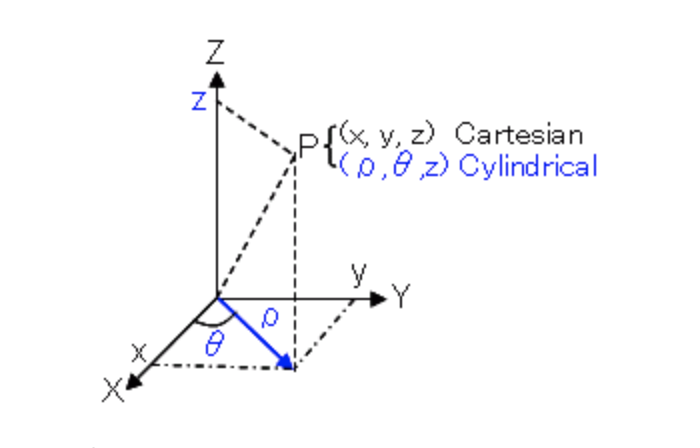


In [ ]:
## project onto specific direction (i.e. spin direction)
def project(vx,vy,vz,nx,ny,nz):
    """
    input:
        velocity components of satellites
        normal components of plane you want to project onto (i.e. Lx, Ly, Lz for ref of central)
    return: 
        (V • n) n
    """
    #normalize n to a unit vector first
    n = np.array([nx,ny,nz])
    norm_n = n/np.sqrt(nx**2 + ny**2 + nz**2)
    #print(shape(norm_n))
    
    V = np.array([vx,vy,vz])
    #print(shape(V))
    
    #return projection vector
    projection_vector = V - np.dot(V,norm_n)*norm_n
    
    return projection_vector.tolist()
    
    
    


In [ ]:
def get_vrot(MWsystem):
    Lx = MWsystem['MW_lx']
    Ly = MWsystem['MW_ly']
    Lz = MWsystem['MW_lz']
    L = np.array([Lx,Ly,Lz])
    L_mag = np.linalg.norm(L)
    unit_ez = L/L_mag
    unit_ez = unit_ez.reshape(3,)
    #print('Unit_ez',unit_ez)
    er = []
    etheta = []
    vrots = []
    
    for i in range(len(MWsystem['sat_pxs'])):
        r = MWsystem['r_sep'][i]
        rz = r[2]
        b = (rz*unit_ez)
        b = b.flatten()
        a = (r - b)
        unit_er = a/np.linalg.norm(a)
        #print('Unit_er',unit_er)
        #print('shape',shape(unit_er))
        #print('shape',shape(unit_ez))
        unit_etheta = np.cross(unit_ez,unit_er)
        
        er.append(unit_er)
        etheta.append(unit_etheta)
        #print('unit_etheta',unit_etheta)
        
        vx = MWsystem['sat_vxs'][i]
        vy = MWsystem['sat_vys'][i]
        vz = MWsystem['sat_vzs'][i]
        v = np.array([vx,vy,vz])
        
        vrot = np.dot(v,unit_etheta)
        vrots.append(vrot)
    
        
    MWsystem['unit_ez'] = unit_ez
    MWsystem['unit_er'] = er
    MWsystem['unit_etheta'] = etheta
    MWsystem['v_rot'] = vrots

In [ ]:
for MWsystem in systems:
    get_vrot(MWsystem)

In [ ]:
systems[syst]['v_rot']

In [ ]:
print(project(1,2,3,4,5,6))

In [ ]:
#subtract off central galaxy velocity 
#gal_ref_vx = [systems[i]['sat_vxs'] - systems[i]['MW_vx'] for i in range(len(systems))]
#gal_ref_vy = [systems[i]['sat_vys'] - systems[i]['MW_vy'] for i in range(len(systems))]
#gal_ref_vz = [systems[i]['sat_vzs'] - systems[i]['MW_vz'] for i in range(len(systems))]
gal_ref_vx = np.asarray(systems[syst]['sat_vxs']) - systems[syst]['MW_vx']
gal_ref_vy = np.asarray(systems[syst]['sat_vys']) - systems[syst]['MW_vy']
gal_ref_vz = np.asarray(systems[syst]['sat_vzs']) - systems[syst]['MW_vz']


"""proj_vect = [project(gal_ref_vx[syst][i],gal_ref_vy[syst][i],gal_ref_vz[syst][i],
                    systems[syst]['MW_lx'][0],systems[syst]['MW_ly'][0],systems[syst]['MW_lz'][0]) for i in range(len(systems[syst]['sat_vxs']))]

proj_vect_x = [proj_vect[i][0] for i in range(len(systems[syst]['sat_vxs']))]
proj_vect_y = [proj_vect[i][1] for i in range(len(systems[syst]['sat_vxs']))]
proj_vect_z = [proj_vect[i][2] for i in range(len(systems[syst]['sat_vxs']))]"""



In [ ]:
print(len(gal_ref_vz))
print(gal_ref_vz)
print(systems[syst]['sat_vzs'])

In [ ]:
#sat_vz = [systems[i]['sat_vzs'] for i in range(len(systems))]
sat_vz = gal_ref_vz
sat_vrho = [np.sqrt((gal_ref_vx)**2 +(gal_ref_vy)**2)]
sat_vtheta = [np.arctan(gal_ref_vy/gal_ref_vx)]

MW_vz = [systems[i]['MW_vz'] for i in range(len(systems))]
MW_vrho = [np.sqrt((systems[i]['MW_vx'])**2 +(systems[i]['MW_vy'])**2) for i in range(len(systems))]
MW_vtheta = [np.arctan(systems[i]['MW_vy']/systems[i]['MW_vx']) for i in range(len(systems))]

In [ ]:
print(sat_vtheta[0])
#print(np.degrees(sat_vtheta[0]))

### Look at Distribution

In [ ]:
# Creating histogram



sat_vmag = np.sqrt((gal_ref_vx)**2 + (gal_ref_vy)**2 + (gal_ref_vz)**2)



# Color by magnitude of projected velocity 
c = sat_vmag
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.inferno(c)

fig = plt.figure(figsize=[10,5])
fig.suptitle('Co-Rotation of Galaxies')


ax = fig.add_subplot(1, 2, 1)

histbins = 10  
#ax.hist(sat_vtheta[syst], density=False,bins =histbins,ec='purple',fc='thistle')
ax.hist(systems[syst]['v_rot'],density=False,bins =histbins,ec='purple',fc='thistle')
#ax.vline(MW_vz[30])
ax.set_title(f'$V_{{theta}}$ of {len(sat_vtheta[0])} Satellites')
ax.set_xlabel(r'$V_{rot} = \vec{v} \bullet \hat{e_{\theta}}$ [km/s]')



ax = fig.add_subplot(1, 2, 2, projection='3d')


#size by virial radius
imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*100**2,c=systems[syst]['halo_level'],edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*100**2,c=systems[syst]['sat_levels'],edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*100**2,c=systems[syst]['MW_level'],edgecolors='darkblue',alpha=0.4,label='Central')
velocities = ax.quiver(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                       gal_ref_vy,gal_ref_vx,gal_ref_vz, color=c,cmap='inferno',pivot='tail',length=2e-3,normalize=True)
MW_velocity= ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_vx'],systems[syst]['MW_vy'],systems[syst]['MW_vz'], color='black',length=3e-3, normalize=True)

v = 1

ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()
  
# Show plot
plt.show()

In [ ]:
#1 is main halo, 2 is sub halo, 3 is sub-sub halo, 4 is sub-sub-sub halo 

#just look at one system
#just look at location of EVERYTHING
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')


sat_vmag = np.sqrt((systems[syst]['sat_vxs'])**2 + (systems[syst]['sat_vys'])**2 + (systems[syst]['sat_vzs'])**2)
#size by virial radius
imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*100**2,c=systems[syst]['halo_level'],edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
"""imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c=systems[syst]['sat_levels'],edgecolors='indianred',alpha=0.4,label='Satellites')"""
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*100**2,c=systems[syst]['sat_mvirs'],edgecolors='indianred',alpha=0.8,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*100**2,c=systems[syst]['MW_level'],edgecolors='darkblue',alpha=0.4,label='Central')
"""velocities = ax.quiver(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                       sat_vz[syst], sat_vrho[syst], sat_vtheta[syst], length=1e-4, normalize=True)"""
velocities = ax.quiver(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                       gal_ref_vx,gal_ref_vy,gal_ref_vz, color=c,cmap='inferno',pivot='tail',length=5e-3,normalize=True)
MW_velocity= ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_vx'],systems[syst]['MW_vy'],systems[syst]['MW_vz'], color='black',length=2e-4, normalize=True)
v = 1

halo_id = systems[syst]['halo_ID']
ax.set_title(f'MW type Halo System {halo_id}, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(imsats,label=r'Mass of Satellites [$M_\odot$]')
plt.colorbar(velocities,label=r'Velocities of Satellites [km/s]',orientation='vertical')
#plt.colorbar(imsats,label=r'Level of Satellites')
plt.colorbar(imhalo,orientation='horizontal',label=r'Level of Haloes')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=[5,5])

histbins = 10  
#ax.hist(sat_vtheta[syst], density=False,bins =histbins,ec='purple',fc='thistle')
ax.hist(systems[syst]['v_rot'],density=False,bins =histbins,ec='purple',fc='thistle')
#ax.vline(MW_vz[30])
ax.set_title(f'$V_{{theta}}$ of {len(sat_vtheta[0])} Satellites')
ax.set_xlabel(r'$V_{rot} = \vec{v} \bullet \hat{e_{\theta}}$ [km/s]')

plt.show()

In [ ]:
#1 is main halo, 2 is sub halo, 3 is sub-sub halo, 4 is sub-sub-sub halo 

#just look at one system
#just look at location of EVERYTHING
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')


sat_vmag = np.sqrt((systems[syst]['sat_vxs'])**2 + (systems[syst]['sat_vys'])**2 + (systems[syst]['sat_vzs'])**2)
"""sat_proj_mag = [np.sqrt(proj_vect_x[i]**2 + proj_vect_y[i]**2 + proj_vect_z[i]**2) for i in range(len(systems[syst]['sat_vzs']))]
sat_proj_mag = np.asarray(sat_proj_mag)
"""

# Color by magnitude of projected velocity 
c = sat_vmag
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.inferno(c)

#size by virial radius
imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*100**2,c=systems[syst]['halo_level'],edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*100**2,c=systems[syst]['sat_levels'],edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*100**2,c=systems[syst]['MW_level'],edgecolors='darkblue',alpha=0.4,label='Central')

velocities = ax.quiver(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                       gal_ref_vy,gal_ref_vx,gal_ref_vz,color=c,cmap='inferno',pivot='tail',length=3e-2, normalize=True)
#velocities = ax.quiver(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                       #systems[syst]['sat_vxs'],systems[syst]['sat_vys'],systems[syst]['sat_vzs'],color=c,cmap='inferno',pivot='tail',length=2e-2, normalize=True)
MW_spin= ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'], color='red',length=6e-2, normalize=True,zorder=10,label='MW Spin')
central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='slateblue',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")

v = 1

ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]')
plt.colorbar(imsats,label=r'Level of Satellites')
plt.colorbar(velocities,label=r'Velocities of Satellites [km/s]',orientation='vertical')
velocities.set_clim(np.min(sat_vmag),np.max(sat_vmag))
plt.colorbar(imhalo,orientation='horizontal',label=r'Level of Haloes')
plt.legend(loc="lower left", markerscale=.05)
plt.show()

## Find number of co-rotating systems

In [ ]:
#sat_vtheta = [np.arctan(systems[i]['sat_vys']/systems[i]['sat_vxs']) for i in range(len(systems))]
co_rotating = []
weird_systs = []
for i in range(len(sat_vtheta)):
    vrots = np.degrees(sat_vtheta[i])
    pos = np.where(vrots > 0)
    neg = np.where(vrots < 1)
    syst_ID = systems[i]['halo_ID']
    if len(vrots[neg]) != 0:
        R_pos = len(vrots[pos])/len(vrots[neg])
    else:
        weird_systs.append([syst_ID,len(systems[i]['sat_vxs'])])
        
    if len(vrots[pos]) != 0:
        R_neg = len(vrots[neg])/len(vrots[pos])
    else:
        weird_systs.append([syst_ID,len(systems[i]['sat_vxs'])])
    
    if R_pos > R_neg:
        co_rotating.append([R_pos,syst_ID,len(systems[i]['sat_vxs'])])
    if R_neg > R_pos:
        co_rotating.append([R_neg,syst_ID,len(systems[i]['sat_vxs'])])

In [ ]:
for i in range(len(co_rotating)):
    print('Ratio:', co_rotating[i][0])
    print('System:', co_rotating[i][1])
    print('Nsats:',co_rotating[i][2])#ratio, system
    print(' ')
print('Weird Systems [System, Nsats]:',weird_systs)

In [ ]:
#write systems to a file for quicker processing in second notebook
import pickle

with open('systems.txt', 'wb') as handle:
    pickle.dump(systems, handle)